# Pre-Processing
### Following steps are done in preprocessing
* First, I took insights into data
* The correlation was analysed by visualizing correlation matrix and pair plot, not strong correlation was found between dependent variables 
* There was some missing values in 'education' and 'previous year ratting' column
* I found that there is a little correlation between age and education hence I filled missing values education based on age and filled previous year ratting with mode value
* Some new data sets were created containing some new features:
   * 1: With new feature service ratio,  Ratio of length of service by age
   * 2: Service gap  : Difference between age and length of service 
   * 3: Third data contain both new features
   * 4: 4rth data contain a feature which is the addition of some important feature
   * 5: In this data, total training score column added which is the product of avg training score and total training
   * 6: In this, recruitment channel column is deleted
   * 7: In this data, binning of age is done
   * 8: In this data, I treated education as an ordinal category means higher education higher number 
* Scaled all newly created data on the standard scale
* Converted categorical variable into dummy variables of all created data
* I created one more data in which a new feature was added which is summary of data, which is one-dimensional representation of whole data created by principal component decomposition
* Saved data for further applications

In [1]:
#Importing libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
%matplotlib inline
#for hiding warnings to avoid confusing viewers
import warnings
warnings.filterwarnings('ignore')
print('python virsion   :',sys.version)
print('pandas virsion     :',pd.__version__)
print('matplotlib virsion :',matplotlib.__version__)
print('numpy virsion      :',pd.__version__)
print('seaborn virsion    :',pd.__version__)

python virsion   : 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
pandas virsion     : 0.23.4
matplotlib virsion : 3.0.2
numpy virsion      : 0.23.4
seaborn virsion    : 0.23.4


In [4]:
train_data= pd.read_csv('train.csv') #importing traning data from saved file

In [5]:
train_data.head() #first 5 instances of train data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
print('number of positive class :',train_data.is_promoted.sum()) 
print('number of negative class :',train_data.is_promoted.count())

number of positive class : 4668
number of negative class : 54808


In [7]:
#deleting 'employee_id' and 'region' column  as it seems to be very less important and has high cardinality 
train_data.drop(['employee_id','region'],axis=1,inplace=True) 

## Analysing correlation matrix

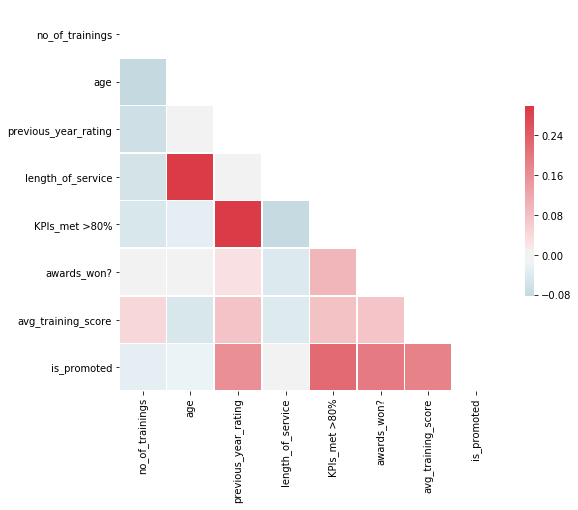

In [8]:
# Compute the correlation matrix
corr = train_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


## Pairplot between different variables 

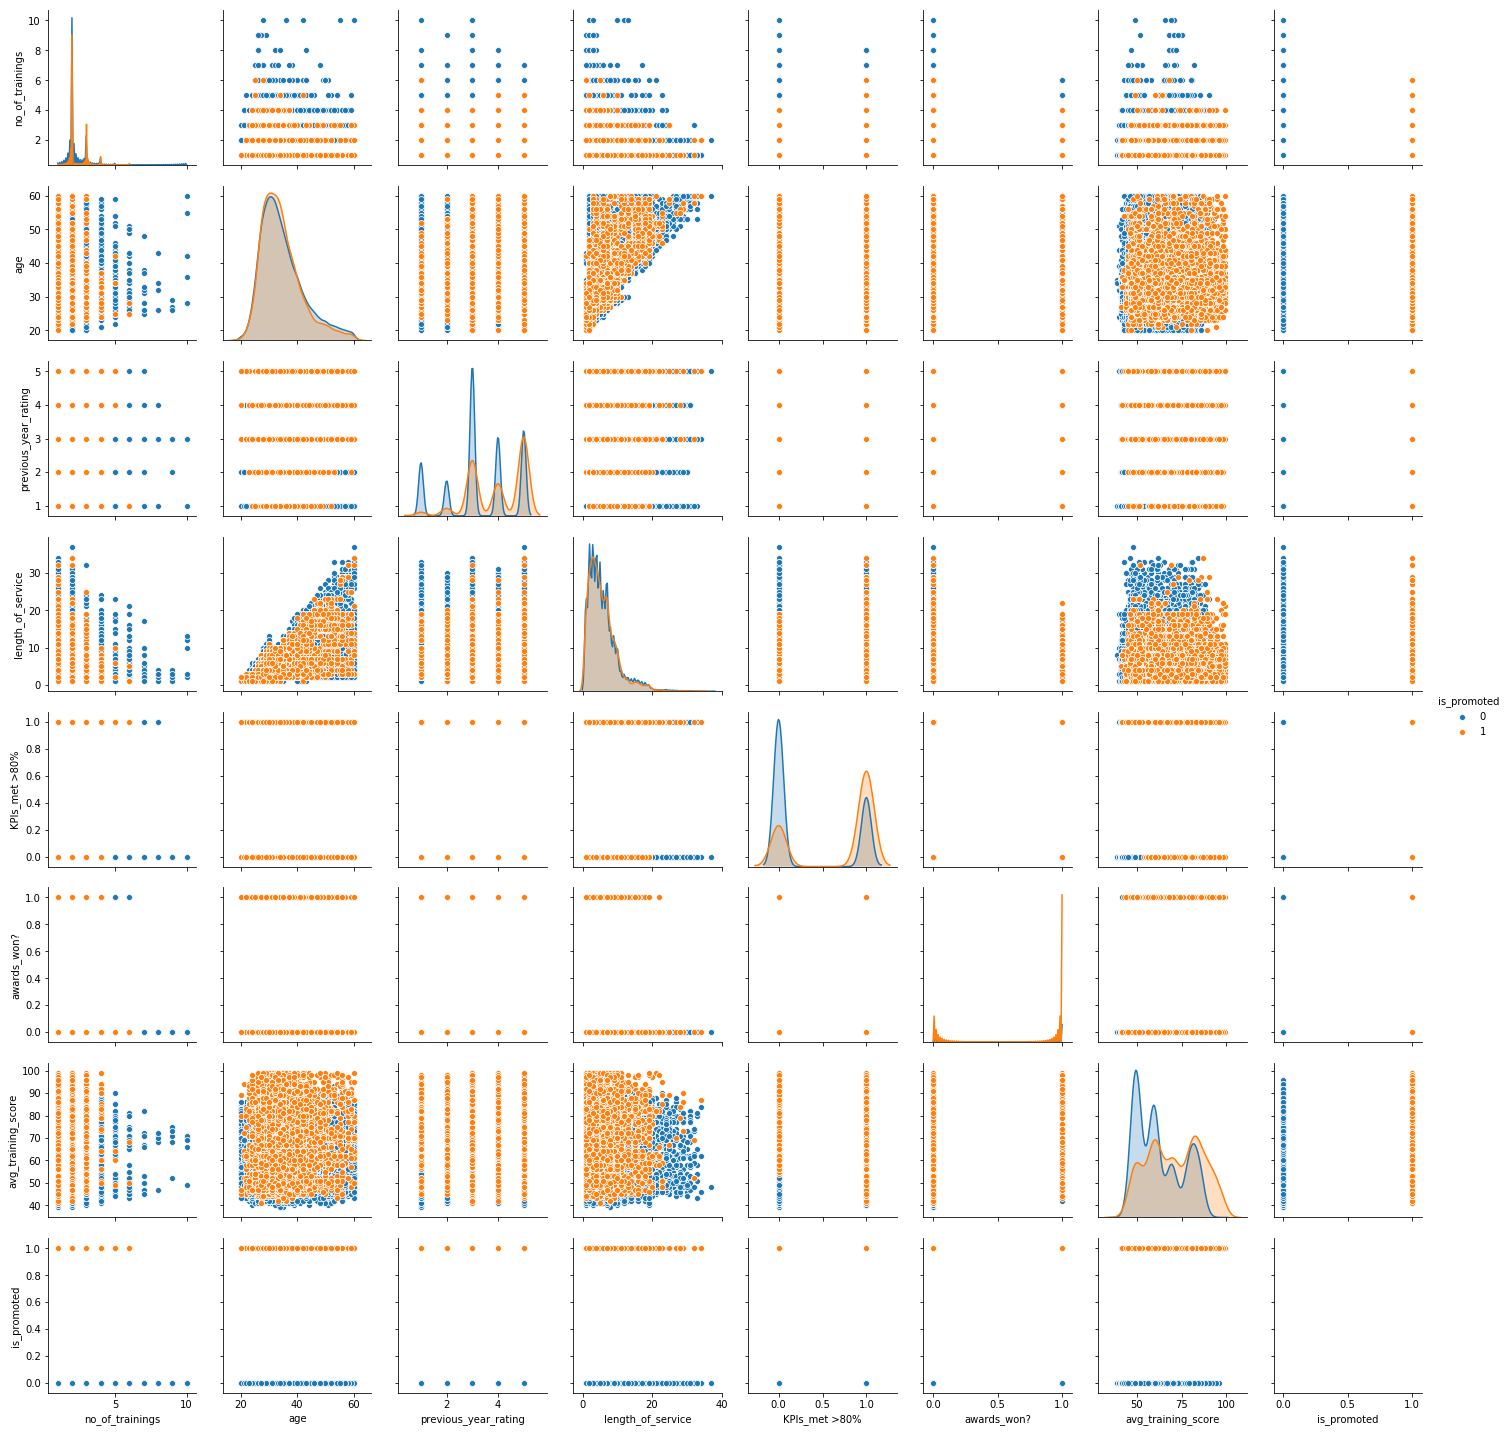

In [9]:
sns.pairplot(train_data,hue="is_promoted")

In [10]:
#checking number of missing values
print('  number of missing values')
print(train_data.isnull().sum())

  number of missing values
department                 0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


## Missing values handling 

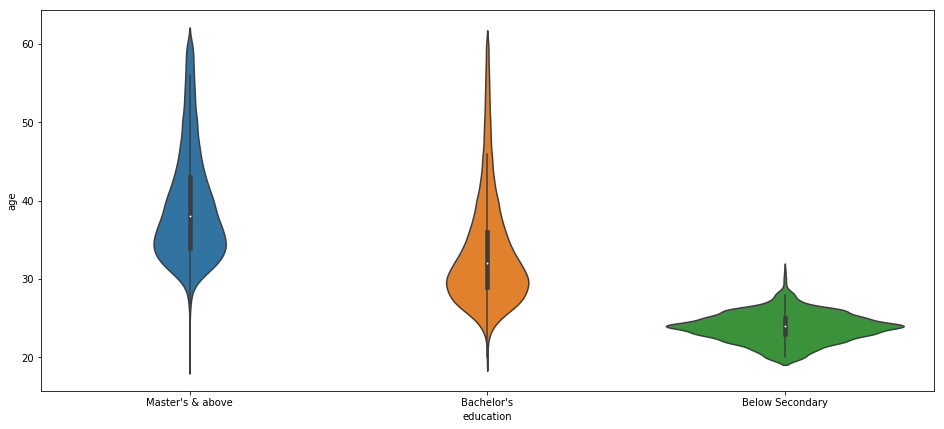

In [11]:
plt.figure(figsize=(16, 7))
sns.violinplot(x='education', y='age', data=train_data)

It is clear that there is a relation between age and education, hence I filled missing values of education with the help of age i.e. below age 25 it is 'Below Secondary' from 25 to 32 'Bachelor's education' above 32 it is 'Masters & above' and there for previous year ratting there is no clear cut relation hance mod value is used for this.

In [12]:
#filling missing values of 'education'
train_data.education.fillna('missing',inplace=True)
for i in range(train_data.shape[0]):
    if train_data['education'][i]=='missing':
        if train_data['age'][i]<=25:
            train_data['education'][i]='Below Secondary'
        if train_data['age'][i]>25 and train_data['age'][i]<=32:
            train_data['education'][i]="Bachelor's"
        if train_data['age'][i]>32:
            train_data['education'][i]="Master's & above"
            
#filling missing values of 'previous_year_rating'
train_data.previous_year_rating.fillna(train_data.previous_year_rating.mode()[0],inplace=True)

In [13]:
print('         train set')
print(train_data.isnull().sum())

         train set
department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


All missing values are filled<br/>
now as mentioned in beginning now I'm creating several other data for experiment purpose whether each newly added feature would work or not, each data would be evaluated further and based on performance new feature would be selected for final training data and testing data

In [14]:
train_1= train_data.copy()
train_2= train_data.copy()
train_3= train_data.copy()
train_4= train_data.copy()
train_5= train_data.copy()
train_6= train_data.copy()
train_7= train_data.copy()
train_8= train_data.copy()
#adding differt features in different training data
train_1['service_ratio']= train_1['length_of_service']/train_1['age']
train_2['service_gap']= train_2['age']-train_2['length_of_service']
train_3['service_ratio']= train_3['length_of_service']/train_1['age']
train_3['service_gap']= train_2['age']-train_3['length_of_service']
train_4['addtion_feature']= train_data['previous_year_rating']+train_data['KPIs_met >80%']+train_data['avg_training_score']+train_data['awards_won?']
train_5['total_training_score'] = train_data['no_of_trainings']*train_data['avg_training_score']
train_6 = train_data.drop(['recruitment_channel'],axis=1)

### Binning of age 

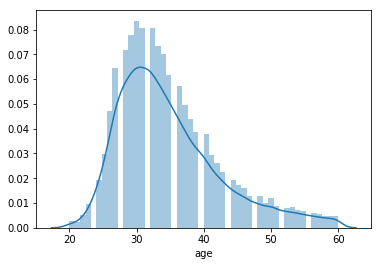

In [15]:
sns.distplot(train_data.age)

From the density plot we can divide age into 6 part<br/>
0: below 25<br/>
1: 25-30<br/>2: 30-35<br/>3: 35-40<br/>4: 40-50<br/>5: above 50

In [16]:
#defining function for binning
def agebin(x):
    if x<25:
        x=0
    if x>=25 and x<30:
        x=1
    if x>=30 and x<35:
        x=2
    if x>=35 and x<40:
        x=3
    if x>=40 and x<50:
        x=4
    if x>=50:
        x=5
    return x
#applying function on data    
train_7['age'] = train_data.age.apply(agebin)

### Converting 'education' from nominal categorical variable to ordinal categorical variable

In [17]:
#mapping 
train_8['education'] = train_8['education'].map({'Below Secondary':0,"Bachelor's":1,"Master's & above":2}).astype(np.int)

## Scaling of data on standard scale

In [18]:
#function for converting into standard scale given data
#only continuous variables are scaled not boolean variables
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
def scaleColumns(train,cols_to_scale):
    for col in cols_to_scale:
        train[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(train[col])),columns=[col])
        return train

#converting all data
train_data = scaleColumns(train_data, ['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score'])
train_1 = scaleColumns(train_1, ['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score','service_ratio'])
train_2 = scaleColumns(train_2, ['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score','service_gap'])
train_3 = scaleColumns(train_3, ['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score','service_ratio','service_gap'])
train_4 = scaleColumns(train_4, ['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score','addtion_feature'])
train_5 = scaleColumns(train_5, ['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score','total_training_score'])
train_6 = scaleColumns(train_6, ['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score'])
train_7 = scaleColumns(train_7, ['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score'])
train_8 = scaleColumns(train_8, ['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score','education'])

## Converting categorical variable into dummy variables 

In [19]:
dummy_train = pd.get_dummies(train_data, drop_first=True) #droping first dummy variable of each column 
dummy_train_1 = pd.get_dummies(train_1, drop_first=True)
dummy_train_2 = pd.get_dummies(train_2, drop_first=True)
dummy_train_3 = pd.get_dummies(train_3, drop_first=True)
dummy_train_4 = pd.get_dummies(train_4, drop_first=True)
dummy_train_5 = pd.get_dummies(train_5, drop_first=True)
dummy_train_6 = pd.get_dummies(train_6, drop_first=True)
dummy_train_7 = pd.get_dummies(train_7, drop_first=True)
dummy_train_8 = pd.get_dummies(train_8, drop_first=True)

### Creating one more data which contain

In [20]:
train_9 = dummy_train.copy() #creating one more data

Creating a new column which is summary of all independent variable using PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
d1_train = pca.fit_transform(dummy_train.drop(['is_promoted'],axis=1)) #creating new column
train_9['summay']= d1_train #adding new column to data

#### We have created all data sets which will be used further   

In [22]:
#shape of each data
print('train_0','......',dummy_train.shape)
print(2*'............')
print('train_1','......',dummy_train_1.shape)
print(2*'............')
print('train_2','......',dummy_train_2.shape)
print(2*'............')
print('train_3','......',dummy_train_3.shape)
print(2*'............')
print('train_4','......',dummy_train_4.shape)
print(2*'............')
print('train_5','......',dummy_train_5.shape)
print(2*'............')
print('train_6','......',dummy_train_6.shape)
print(2*'............')
print('train_7','......',dummy_train_7.shape)
print(2*'............')
print('train_8','......',dummy_train_8.shape)
print(2*'............')
print('train_9','......',train_9.shape)

train_0 ...... (54808, 21)
........................
train_1 ...... (54808, 22)
........................
train_2 ...... (54808, 22)
........................
train_3 ...... (54808, 23)
........................
train_4 ...... (54808, 22)
........................
train_5 ...... (54808, 22)
........................
train_6 ...... (54808, 19)
........................
train_7 ...... (54808, 21)
........................
train_8 ...... (54808, 20)
........................
train_9 ...... (54808, 22)


## Saving all data sets into .csv file

In [23]:
dummy_train.to_csv('PP_train_0.csv',index=False)
dummy_train_1.to_csv('PP_train_1.csv',index=False)
dummy_train_2.to_csv('PP_train_2.csv',index=False)
dummy_train_3.to_csv('PP_train_3.csv',index=False)
dummy_train_4.to_csv('PP_train_4.csv',index=False)
dummy_train_5.to_csv('PP_train_5.csv',index=False)
dummy_train_6.to_csv('PP_train_6.csv',index=False)
dummy_train_7.to_csv('PP_train_7.csv',index=False)
dummy_train_8.to_csv('PP_train_8.csv',index=False)
train_9.to_csv('PP_train_9.csv',index=False)

# end